In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from collections import Counter
import re


csv_path = os.path.join(
    "..",
    "data",
    "raw",
    "Juggernaut Sentiment Analysis - by kaggle user Adeoluwa Adeboye.csv"
)

data = pd.read_csv(csv_path, on_bad_lines='skip')
data = data[['SentimentText', 'Sentiment']]
data

,SentimentText,Sentiment
0,is so sad for my APL frie...,0
1,I missed the New Moon trail...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,i think mi bf is cheating on me!!! ...,0
...,...,...
1578607,Zzzzzz.... Finally! Night tweeters!,1
1578608,"Zzzzzzz, sleep well people",1
1578609,ZzzZzZzzzZ... wait no I have homework.,0
1578610,"ZzZzzzZZZZzzz meh, what am I doing up again?",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578612 entries, 0 to 1578611
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   SentimentText  1578612 non-null  object
 1   Sentiment      1578612 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.1+ MB


Label counts:
 Sentiment
1    790177
0    788435
Name: count, dtype: int64
Label distribution:
 Sentiment
1    0.500552
0    0.499448
Name: count, dtype: float64


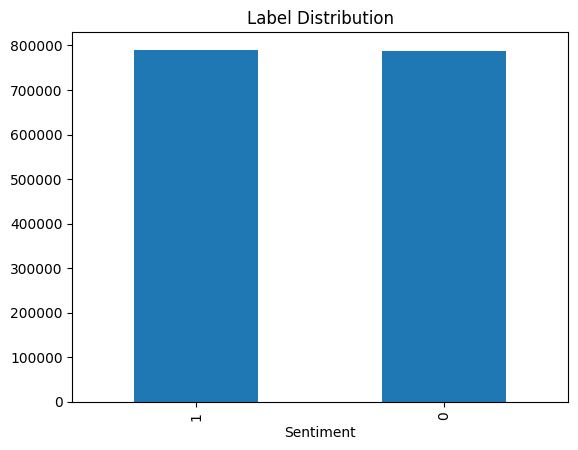

In [6]:
# Distribution of labels
label_counts = data['Sentiment'].value_counts()
label_dist = label_counts / len(data)
print("Label counts:\n", label_counts)
print("Label distribution:\n", label_dist)

# Plot
label_counts.plot(kind='bar', title='Label Distribution')
plt.show()

In [7]:
# Texts length stats
data['text_len'] = data['SentimentText'].str.split().apply(len)
print(data['text_len'].describe())

count    1.578612e+06
mean     1.327305e+01
std      6.914467e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: text_len, dtype: float64


In [8]:
# Most common words
def simple_tok(text):
    return re.findall(r'\w+', text.lower())

all_tokens = [tok for text in data['SentimentText'] for tok in simple_tok(text)]
common_words = Counter(all_tokens).most_common(20)
print("Top 20 words:")
common_words

Top 20 words:


[('i', 951244),
 ('to', 561651),
 ('the', 521774),
 ('a', 380194),
 ('my', 313932),
 ('it', 303523),
 ('and', 302718),
 ('you', 299769),
 ('is', 236629),
 ('in', 215598),
 ('for', 215137),
 ('s', 187275),
 ('of', 183030),
 ('t', 181027),
 ('on', 167118),
 ('that', 165329),
 ('me', 164337),
 ('so', 152443),
 ('have', 144708),
 ('m', 136197)]

In [9]:
# Class length differences
print(data.groupby('Sentiment')['text_len'].mean())

Sentiment
0    13.713761
1    12.833306
Name: text_len, dtype: float64
